<a href="https://colab.research.google.com/github/Rakshithadhandre/OIBSIP/blob/main/Iris_Flower_Classification_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [64]:
df=pd.read_csv("/content/drive/MyDrive/Iris.csv")

In [65]:
df.head() #gives starting 5 rows from dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [67]:
df.shape

(150, 6)

In [68]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [69]:
df.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

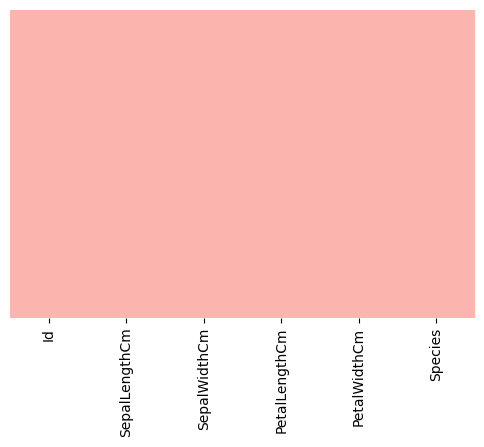

In [70]:
#for checking whether the given dataset contains null values or not
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Pastel1')
  return plt.show()#gist_rainbow
get_heatmap(df)

In [71]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [72]:
df.Species.value_counts

<bound method IndexOpsMixin.value_counts of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object>

In [73]:
X= df[['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y= df['Species']

In [74]:
X


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [75]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [76]:
#train/test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [77]:
# Training the Linear Regression Model

from sklearn.linear_model import LogisticRegression

In [78]:
X_train


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,23,4.6,3.6,1.0,0.2
15,16,5.7,4.4,1.5,0.4
65,66,6.7,3.1,4.4,1.4
11,12,4.8,3.4,1.6,0.2
42,43,4.4,3.2,1.3,0.2
...,...,...,...,...,...
71,72,6.1,2.8,4.0,1.3
106,107,4.9,2.5,4.5,1.7
14,15,5.8,4.0,1.2,0.2
92,93,5.8,2.6,4.0,1.2


In [79]:
X_test

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,74,6.1,2.8,4.7,1.2
18,19,5.7,3.8,1.7,0.3
118,119,7.7,2.6,6.9,2.3
78,79,6.0,2.9,4.5,1.5
76,77,6.8,2.8,4.8,1.4
31,32,5.4,3.4,1.5,0.4
64,65,5.6,2.9,3.6,1.3
141,142,6.9,3.1,5.1,2.3
68,69,6.2,2.2,4.5,1.5
82,83,5.8,2.7,3.9,1.2


In [80]:
#Normalizing the data-standard scalar
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(X_train)#normalization
X_test=sst.transform(X_test)

In [81]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [82]:
model.fit(X_train,y_train)

LogisticRegression()

In [83]:
y_pred=model.predict(X_test)

In [84]:
model.score(sst.transform(X),y)

1.0

In [85]:
model.score(X_train,y_train)

1.0

In [86]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, model.predict(X_test)))#calculate the accuracy of our trained modelS

1.0


In [87]:
model.score(X_train,y_train)

1.0

In [88]:
model.score(X_test,y_test)

1.0

In [89]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test)*100,'%')

100.0 %
